This is a quick script to check how I should do the power calculation when determining the crosstalk matrix. The aim is to decompose a HG11 mode into its LG components
I know that I should expect there to be two hg Components, each with 50% of the power. If this is what I find then the crosstalk power calculation is working. Note that whilst the equation is not finding unity power, this seems to come down to the finite resolution of the simulation

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append(
    '/Users/ultandaly/Library/CloudStorage/OneDrive-UniversityofGlasgow/Projects/python_simulation/packages/')

import propagation_functions as prop

res = 256
screen_width = 0.4
wavelength = 1.55e-6
beam_waist = 0.04

max_lg_range = 3

pixel_size = screen_width/res

#BOTH LG AND HG ARE NORMALISED

#define HG beam
beam_1 = prop.BeamProfile(res, screen_width, wavelength)
beam_1.hermite_gaussian_beam(1, 1, beam_waist)
beam_1.field /= np.sqrt(np.sum(beam_1.field * np.conj(beam_1.field)))
beam_1.field *= 2
#define LG decomposition basis
test_beams = []
for l in range(-max_lg_range, max_lg_range):
    for p in range(max_lg_range):
        beam = prop.BeamProfile(res, screen_width, wavelength)
        beam.laguerre_gaussian_beam(l, p, beam_waist)
        beam.field /= np.sqrt(np.sum(beam.field * np.conj(beam.field)))
        test_beams.append(beam)

#find the overlap of the two beams. Note that I do not need to worry about dx for this part

olap = []
for i, tst in enumerate(test_beams):
    olap.append(np.trapz(np.trapz(beam_1.field * np.conj(tst.field))))

#reconstruct the HG mode from the calculatd LG components
recon = np.zeros((res, res), dtype=np.complex128)
i = 0
for l in range(-max_lg_range, max_lg_range):
    for p in range(max_lg_range):
        beam = prop.BeamProfile(res, screen_width, wavelength)
        beam.laguerre_gaussian_beam(l, p, beam_waist)
        beam.field /= np.sqrt(np.sum(beam.field * np.conj(beam.field)))
        recon += beam.field * olap[i]
        i += 1

#find the overlap of the reconstruction and the HG beam
overlap_percent = np.sum(recon * np.conj(beam_1.field))

#find powers of different representations
hg_pow = np.sum(beam_1.field * np.conj(beam_1.field))
recon_pow = np.sum(recon * np.conj(recon))
basis_vec_pow = np.sum(np.abs(olap)**2.0)

print(f"Power in HG representation: {hg_pow} \n Power in Reconstruction: {recon_pow} \n Power in Basis Vector Representation: {basis_vec_pow} \n Overlap Integral: {overlap_percent}")

Power in HG representation: 4.0 
 Power in Reconstruction: (3.9999999999998592+0j) 
 Power in Basis Vector Representation: 3.999999999999858 
 Overlap Integral: (3.999999999999858+3.556475122562313e-19j)


One last cell that contains all plots of interest

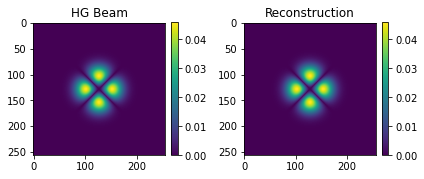

In [116]:
fig, axs = plt.subplots(1, 2)

pcm = axs[0].imshow(np.abs(beam_1.field))
fig.colorbar(pcm, ax = axs[0], fraction = 0.046, pad = 0.04)
axs[0].set_title('HG Beam')

pcm = axs[1].imshow(np.abs(recon))
fig.colorbar(pcm, ax=axs[1],  fraction=0.046, pad=0.04)
axs[1].set_title('Reconstruction')

plt.tight_layout()



Text(0.5, 1.0, 'Power in LG Modes')

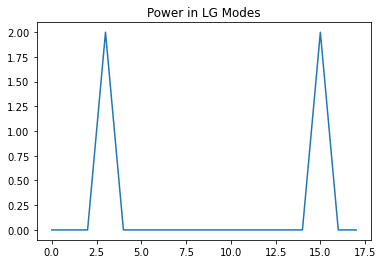

In [121]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.abs(olap)**2.0)
ax.set_title('Power in LG Modes')


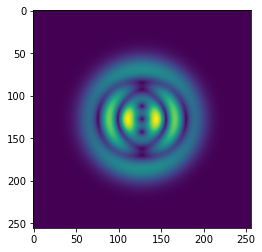

In [9]:
rnd_beam = 0.6*test_beams[7].field + 0.9 * test_beams[2].field
plt.imshow(np.abs(rnd_beam))

In [10]:
olap = []
for i, tst in enumerate(test_beams):
    olap.append(np.trapz(np.trapz(rnd_beam* np.conj(tst.field))))

In [11]:
np.abs(olap)**2.0

array([8.67123357e-32, 2.75184575e-29, 8.10000000e-01, 1.99278456e-34,
       4.38428319e-35, 1.92868125e-34, 4.88630568e-35, 3.60000000e-01,
       3.08202729e-33, 9.50156876e-36, 1.24659824e-36, 1.93169412e-34,
       6.48402344e-35, 1.01892170e-31, 4.38204915e-29, 6.90127025e-35,
       1.49223298e-35, 4.58748045e-34])